# Output analysis

In [1]:
# Importing external packages

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
from tqdm import tqdm

In [2]:
# Importing model scripts, by first adding the main folder path

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
import plotter

In [3]:
model = ModelNile()

Network node of IrrigationDistrict Egypt is a sink


In [4]:
model.model_topology

In [5]:
# Change the font type of matplotlib figures to make it match with the report

import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont("Minion Pro Regular.ttf")
matplotlib.rc("font", family="Minion Pro")

from matplotlib import rcParams

rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"
rcParams["font.size"] = 12

Read the results of the optimization:

In [6]:
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns="Unnamed: 0")
opt_results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v160,v161,v162,v163,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,0.005230,0.087435,0.580001,0.310944,-0.799528,0.201181,-0.353628,0.206939,0.482676,0.421363,...,0.390411,0.315424,0.513462,0.395253,5.844010,1.567849,0.241667,0.079331,0.000000,15.009673
1,0.005551,0.114852,0.416813,0.215447,-0.673022,0.456056,-0.318718,0.234759,-0.018857,0.743872,...,0.359905,0.096117,0.706763,0.365144,4.668698,1.237710,0.295833,0.000000,0.000000,14.373421
2,0.030241,0.398095,0.573043,0.220262,-0.598047,0.496106,0.253868,0.234760,0.435696,0.743870,...,0.359905,0.047483,0.701069,0.738340,5.370892,1.455804,0.137500,0.000000,0.000000,14.266241
3,0.006389,0.087435,0.580001,0.310944,-0.833288,0.201181,-0.353859,0.207264,0.482676,0.748096,...,0.390411,0.315424,0.513462,0.395253,5.994473,1.616057,0.208333,0.072954,0.000000,15.009900
4,0.005551,0.107585,0.416813,0.215447,-0.673022,0.456056,-0.318718,0.236351,-0.014472,0.743872,...,0.359905,0.096117,0.712165,0.365144,4.551618,1.267336,0.362500,0.000000,0.000000,14.304393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.007144,0.830940,0.072902,0.300844,-0.734843,0.473411,-0.435552,0.227989,0.482517,0.725999,...,0.387070,0.135222,0.498183,0.403332,4.411613,1.121729,0.391667,0.061653,0.000000,14.827489
336,0.007175,0.116353,0.069463,0.302781,-0.400135,0.843066,-0.316056,0.241993,0.481670,0.507203,...,0.081385,0.096010,0.531320,0.395016,4.890457,1.293816,0.258333,0.094999,0.000000,14.896243
337,0.000513,0.129930,0.420403,0.225014,-0.736449,0.426963,0.319920,0.360090,0.419278,0.743356,...,0.020901,0.362356,0.496281,0.726937,17.844476,4.218377,0.000000,0.554119,0.168737,15.100161
338,0.050106,0.114851,0.432650,0.216325,-0.668630,0.415235,-0.326855,0.192464,0.516901,0.743872,...,0.354453,0.096736,0.711723,0.365124,4.495443,1.005045,0.250000,0.008598,0.000000,12.654251


Let's split the policy and objective value dataframes:

In [7]:
policies, objectives = opt_results.iloc[:, :-6], opt_results.iloc[:, -6:]

In [8]:
objectives.describe()

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,5.799038,1.425814,0.277279,0.137928,0.012462,13.941639
std,2.807234,0.757129,0.236762,0.196730,0.034875,1.303515
min,3.499272,0.508538,0.000000,0.000000,0.000000,9.424000
25%,4.502679,1.051275,0.087500,0.001429,0.000000,13.235413
50%,5.002051,1.285461,0.216667,0.048857,0.000000,14.330341
75%,5.941854,1.527429,0.391667,0.160708,0.000000,15.012950
max,18.462717,5.171043,0.883333,0.724290,0.172364,15.125298


In [9]:
(objectives.sudan_90 > 0).sum()

49

Let's kick out the Sudan 90 objective as no meaningful deficit occured:

In [10]:
# objectives = objectives.drop(columns=["sudan_90"])

Query the policies which yield best performance with respect to each objective:

In [11]:
best_obj_indices = dict()
directions = ["min", "min", "min", "min", "min", "max"]

for i, obj in enumerate(objectives):
    if directions[i] == "min":
        indexes = objectives.loc[objectives[obj] == objectives[obj].min(), :].index
    elif directions[i] == "max":
        indexes = objectives.loc[objectives[obj] == objectives[obj].max(), :].index
    else:
        print("issue with directions!")

    best_obj_indices[obj] = indexes

In [12]:
best_obj_indices

{'egypt_irr': Int64Index([271], dtype='int64'),
 'egypt_90': Int64Index([328], dtype='int64'),
 'egypt_low_had': Int64Index([ 66,  86,  98, 101, 104, 105, 118, 130, 133, 172, 183, 201, 203,
             233, 265, 280, 293, 294, 299, 301, 309, 327, 337],
            dtype='int64'),
 'sudan_irr': Int64Index([  1,   2,   4,   5,   6,   7,   8,  10,  14,  15,  19,  20,  22,
              23,  32,  33,  37,  39,  41,  42,  43,  44,  50,  53,  54,  56,
              59,  62,  65,  69,  72,  74,  77,  79,  84,  88,  89,  96,  99,
             106, 107, 110, 116, 123, 129, 132, 142, 143, 144, 145, 154, 155,
             157, 163, 165, 166, 170, 179, 184, 193, 195, 196, 206, 211, 213,
             215, 225, 226, 227, 238, 242, 243, 250, 252, 253, 257, 260, 265,
             278, 288, 292, 315, 316, 319, 329],
            dtype='int64'),
 'sudan_90': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             328, 329, 331, 332, 333, 334, 335, 336, 338, 339],
    

In [13]:
for i in best_obj_indices["sudan_irr"]:
    if i in best_obj_indices["egypt_low_had"]:
        print(i)

265


In [14]:
best_egypt_irr = policies.loc[271]
best_egypt_90 = policies.loc[328]
best_egypt_low_had = policies.loc[265]
best_ethiopia = policies.loc[86]

Before redoing the simulation with found policies, let's do some objectives visualization:

## Parallel Coordinates Plot

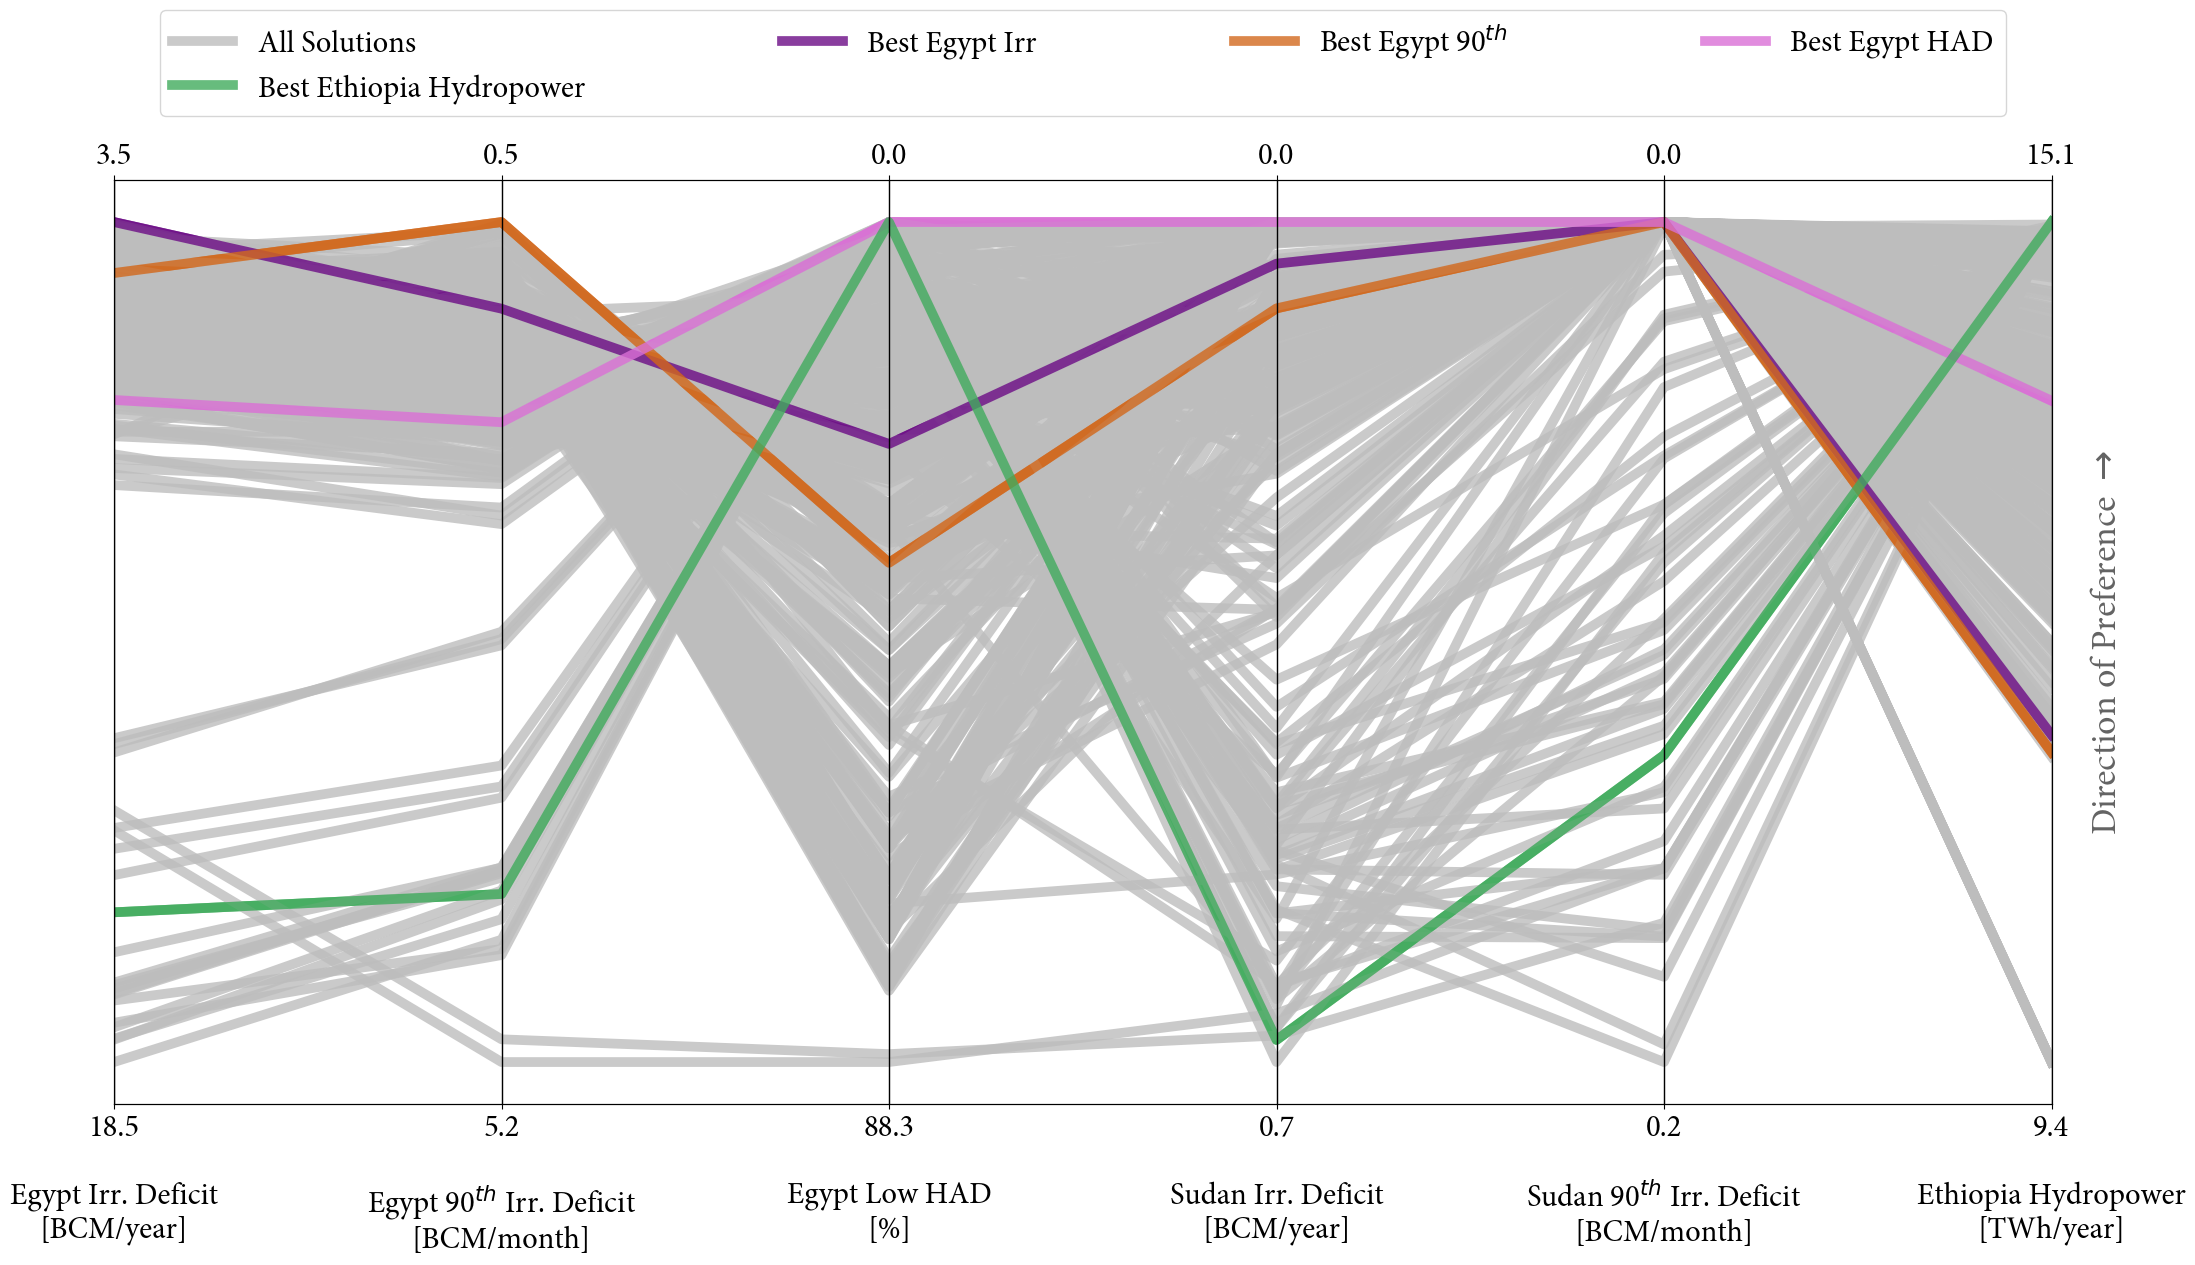

In [15]:
from plotter import parallel_plots_many_policies

parallel_plots_many_policies(
    objectives,
    solution_indices=[271, 328, 265, 86],
    solution_names=[
        "Best Egypt Irr",
        "Best Egypt 90$^{th}$",
        "Best Egypt HAD",
        "Best Ethiopia Hydropower",
    ],
)
plt.show()

In [16]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min":
            best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max":
            best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)

    return working_df, desirability_couples

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0. On top of the normalised objectives dataframe, we can find some compromise solutions and include them into the color-coded policy set.

In [17]:
norm_df, desire_couples = normalize_objs(
    objectives, ["min", "min", "min", "min", "min", "max"]
)

In [18]:
def find_percentile_compromise_solutions(objectives_norm_df, percentile):
    # Given a threshold percentage and normalised objectives data frame,
    # returns the indices which performs above the threshold percentage
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        threshold = np.percentile(objectives_norm_df[col], percentile)
        index_lists.append(
            objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
        )

    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list:
                break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)

    return common_indices

In [19]:
def find_threshold_compromise_solutions(objectives_norm_df, threshold):
    # Given a threshold value [0-1] and normalised objectives data frame,
    # returns the indices which performs above the threshold value
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        index_lists.append(
            objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
        )

    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list:
                break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)

    return common_indices

In [20]:
find_percentile_compromise_solutions(norm_df, 45)

[165]

In [21]:
find_threshold_compromise_solutions(norm_df, 0.82)

[248]

Now, we can add two more solutions into the policy set for further analysis:

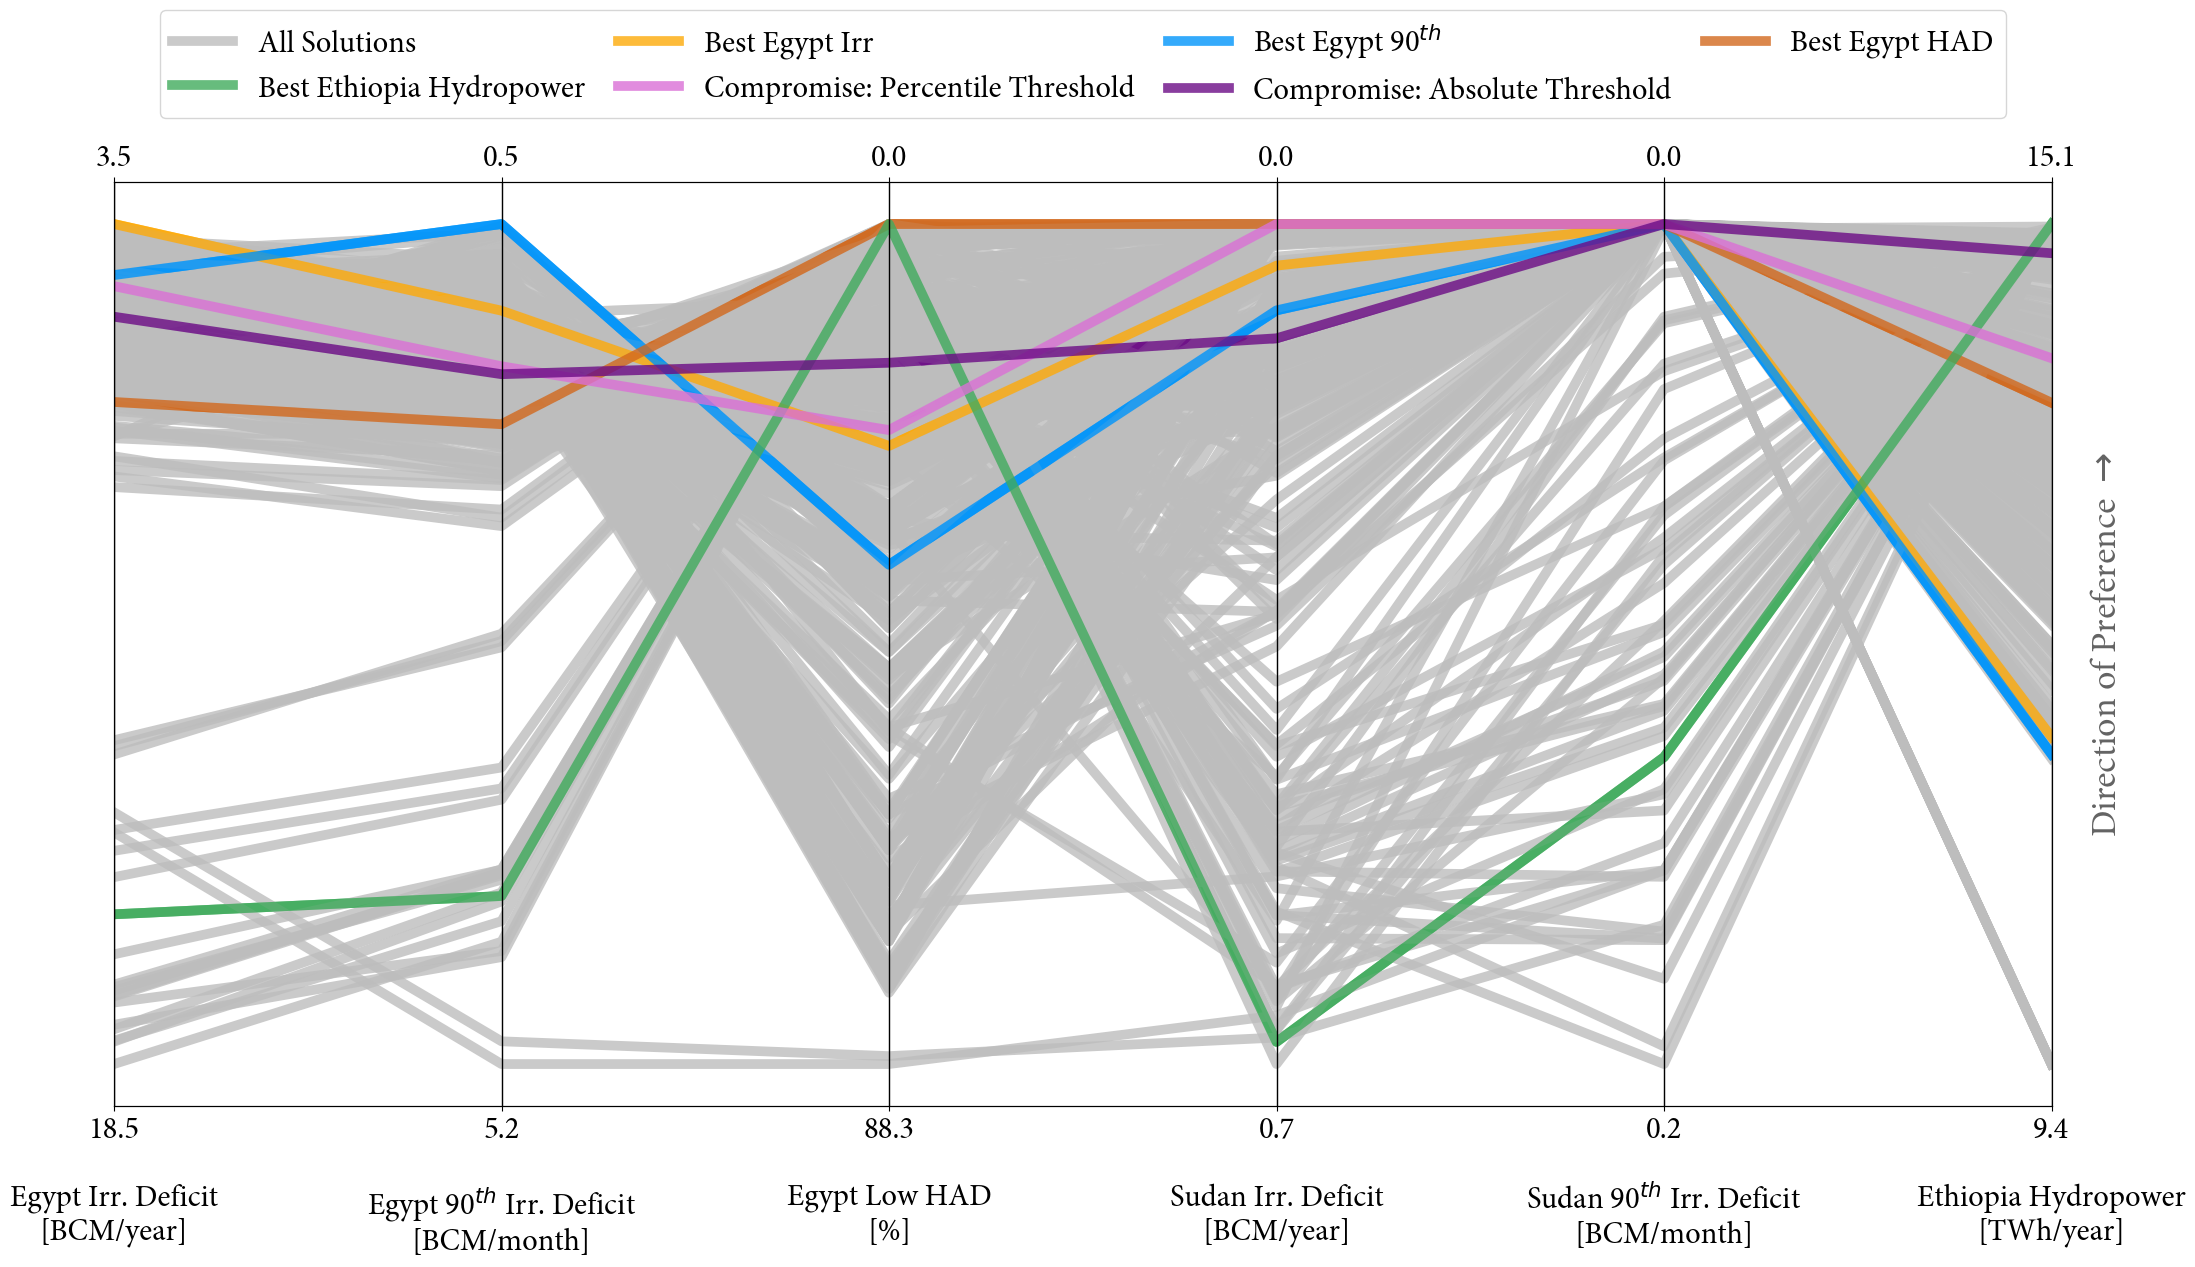

In [22]:
import importlib

importlib.reload(plotter)

solution_indices = [271, 328, 265, 86, 165, 248]
solution_names = [
    "Best Egypt Irr",
    "Best Egypt 90$^{th}$",
    "Best Egypt HAD",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile Threshold",
    "Compromise: Absolute Threshold",
]

plotter.parallel_plots_many_policies(
    objectives,
    solution_indices=solution_indices,
    solution_names=solution_names,
)

plt.savefig("../plots/baseline_optimization/parallel_plots.svg", bbox_inches="tight")
plt.show()

For the following stage of open exploration/scenario discovery, we save the six exemplary policies from above analysis:

In [23]:
policies_for_exploration = policies.loc[[271, 328, 265, 86, 165, 248], :]
policies_for_exploration["name"] = [
    "best_egypt_aggregate",
    "best_egypt_90",
    "best_egypt_HAD",
    "best_ethiopia",
    "compromise_percentile",
    "compromise_threshold",
]
policies_for_exploration

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v155,v156,v157,v158,v159,v160,v161,v162,v163,name
271,0.206139,0.841216,0.433388,0.312607,-0.639209,0.497186,0.243555,0.209494,0.452019,0.419376,...,0.798202,0.606770,0.072226,-0.513673,0.783907,0.464776,0.917460,0.288774,0.741250,best_egypt_aggregate
328,0.206644,0.840042,0.435042,0.313054,-0.647012,0.182057,0.243555,0.209949,0.409385,0.814444,...,0.837711,0.607179,0.060471,-0.063402,0.783757,0.613486,0.917244,0.267945,0.395019,best_egypt_90
265,0.051467,0.095422,0.532044,0.204460,-0.644767,0.729660,0.230533,0.230292,0.401501,0.729772,...,0.285301,0.617580,0.455122,-0.113526,0.378745,0.300048,0.093770,0.547144,0.717352,best_egypt_HAD
86,0.000498,0.114311,0.060848,0.258834,-0.497427,0.755687,0.243618,0.370826,0.452172,0.406246,...,0.272551,0.605138,0.530674,0.696235,0.785382,0.353840,0.143673,0.631744,0.766430,best_ethiopia
165,0.030241,0.114421,0.573043,0.217816,-0.673022,0.456056,-0.329172,0.234760,0.435991,0.411717,...,0.268289,0.607363,0.149311,0.783177,0.337864,0.362357,0.096117,0.524998,0.736824,compromise_percentile
248,0.007008,0.794490,0.072902,0.303684,-0.734843,0.195545,-0.435552,0.225561,0.480877,0.725999,...,0.268529,-0.359375,0.084454,-0.055294,0.162174,0.110857,0.135222,0.498183,0.370962,compromise_threshold


In [24]:
policies_for_exploration.to_csv("../outputs/policies_exploration.csv", index=False)

## Pair plot of Objective Values

Now, let's show the pairplot of all objectives across the set of solutions found by the optimisation:

In [25]:
# names_display = [
#     "Egypt Irr. Deficit",
#     "Egypt 90$^{th}$ Irr. Deficit",
#     "Egypt Low HAD",
#     "Sudan Irr. Deficit",
#     "Sudan 90$^{th}$ Irr. Deficit",
#     "Ethiopia Hydropower",
# ]
# norm_df_names = norm_df.copy()
# norm_df_names.columns = names_display
# sns.pairplot(
#     norm_df_names,
#     corner=True,
#     diag_kind="kde",
#     kind="reg",
#     plot_kws={"line_kws": {"color": "red"}},
# )
# plt.show()

## System Behaviour under Selected Policies

Let's first create and run a separate model under every one of the policies and store them in a dict. Then, bring the plotter class for visuals.

In [26]:
solution_indices = [271, 328, 265, 86, 165, 248]
solutions = [policies.loc[i] for i in solution_indices]
solution_names = [
    "Best Egypt Irr",
    "Best Egypt 90$^{th}$",
    "Best Egypt HAD",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile Threshold",
    "Compromise: Absolute Threshold",
]
running_models = dict()
for i, sol_name in tqdm(enumerate(solution_names)):
    new_model = ModelNile()
    new_model = generate_input_data(new_model)
    new_model.evaluate(solutions[i])
    running_models[sol_name] = new_model

0it [00:00, ?it/s]

Network node of IrrigationDistrict Egypt is a sink


1it [00:14, 14.18s/it]

Network node of IrrigationDistrict Egypt is a sink


2it [00:28, 14.05s/it]

Network node of IrrigationDistrict Egypt is a sink


3it [00:42, 14.16s/it]

Network node of IrrigationDistrict Egypt is a sink


4it [00:56, 14.23s/it]

Network node of IrrigationDistrict Egypt is a sink


5it [01:10, 14.16s/it]

Network node of IrrigationDistrict Egypt is a sink


6it [01:25, 14.20s/it]


In [28]:
running_models["Best Egypt Irr"].object_by_name("HAD").release_vector

array([2190.12564854, 2194.99382355, 2200.92720293, 2273.61283435,
       2609.18151668, 3059.84012759, 3384.30107584, 2942.21452118,
       2266.05462694, 2196.08365708, 2188.66597094, 2188.31700033,
       2197.91830001, 2195.6445175 , 2200.12856888, 2276.99806425,
       2619.94704948, 3104.27206916, 3426.94343611, 2974.3653102 ,
       2240.84909107, 2196.06617505, 2188.66570203, 2188.30261857,
       2196.30187399, 2194.93531551, 2201.50390571, 2282.60965833,
       2629.86656529, 3130.98732839, 3401.10523483, 2982.60264118,
       2298.88137254, 2195.49362126, 2188.71788471, 2188.33487377,
       2200.14258858, 2197.12797947, 2202.47164284, 2285.92611851,
       2641.4189602 , 3169.43181663, 3473.89495038, 3016.96370917,
       2286.31047749, 2195.73355718, 2188.74141641, 2188.34311677,
       2201.2805078 , 2199.94807472, 2203.29758766, 2283.7470127 ,
       2663.17567589, 3207.47960386, 3458.45766507, 3032.74700377,
       2291.52348398, 2198.26597991, 2188.853975  , 2188.37567

In [27]:
import importlib

importlib.reload(plotter)

for key, value in running_models.items():
    print("----------------")
    print(key)
    print("----------------")
    my_plotter = plotter.HydroModelPlotter(value)

    for dam in ["GERD", "HAD"]:
        my_plotter.plot_condensed_release_versus_inflow(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/release_vs_inflow_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

        my_plotter.plot_condensed_level(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/condensed_level_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

        my_plotter.plot_level_with_limits(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/level_with_limits_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

    for district in ["Egypt", "Gezira"]:
        my_plotter.plot_received_vs_demand_for_district_raw_condensed(district)
        plt.savefig(
            f"../plots/baseline_optimization/{district}/received_vs_demand_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

----------------
Best Egypt Irr
----------------


AttributeError: 'ModelNile' object has no attribute 'reservoirs'